In [1]:
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #, GridSearchCV
from sklearn.utils import shuffle
import os

In [2]:
Df = pd.read_csv("../input/global-co2-emissions/CO2Emission_LifeExp.csv",index_col=0)

In [3]:
Df.head(10)

,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
Country,,,,,,
Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
Albania,ALB,5208319,4.45,1.80,2886438,78.194
Algeria,DZA,156220560,0.17,3.85,40551392,76.298
Angola,AGO,30566933,3.13,1.06,28842489,59.925
Anguilla,AIA,30262,1.52,2.10,14429,81.441
Antigua and Barbuda,ATG,438763,1.51,4.64,94527,76.617
Argentina,ARG,200708270,0.16,4.61,43508460,76.221
Armenia,ARM,4597845,3.06,1.57,2936143,74.640
Aruba,ABW,286871,1.51,2.74,104872,75.868


In [4]:
Df.tail()

,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
Country,,,,,,
Vietnam,VNM,206042140,0.09,2.20,93640422,75.172
Western Sahara,ESH,207592,2.61,0.39,538749,69.496
Yemen,YEM,25647990,1.62,0.94,27168208,66.087
Zambia,ZMB,4230584,3.67,0.26,16363458,62.464
Zimbabwe,ZWE,10062628,-4.17,0.72,14030331,60.294


In [5]:
print(f"This dataset have {Df.shape[0]} rows and {Df.shape[1]} columns")

This dataset have 208 rows and 6 columns


In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            208 non-null    object 
 1   CO2Emissions    208 non-null    int64  
 2   YearlyChange    208 non-null    float64
 3   Percapita       208 non-null    float64
 4   Population      208 non-null    int64  
 5   LifeExpectancy  208 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [7]:
Df.describe()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
count,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,1.661510e+08,2.586538,4.700577,3.547621e+07,72.699375
std,8.327638e+08,3.266324,5.735284,1.388659e+08,7.708037
min,1.530000e+03,-6.380000,0.030000,2.928000e+03,51.593000
25%,1.679310e+06,1.510000,0.690000,1.156140e+06,67.906250
50%,9.387305e+06,2.215000,2.605000,6.998900e+06,74.301500
75%,5.969547e+07,3.605000,6.415000,2.401059e+07,78.655250
max,1.043275e+10,19.490000,37.290000,1.414049e+09,84.277000


In [8]:
Df.Population.describe()

count    2.080000e+02
mean     3.547621e+07
std      1.388659e+08
min      2.928000e+03
25%      1.156140e+06
50%      6.998900e+06
75%      2.401059e+07
max      1.414049e+09
Name: Population, dtype: float64

## Data Exploration

In [9]:
(Df[['CO2Emissions']].sort_values(
by='CO2Emissions', 
ascending=False)[0:10]/1000000000
).rename(
    columns={'CO2Emissions': 'CO2 Emissions (GT)'}
).round(1)

,CO2 Emissions (GT)
Country,
China,10.4
United States,5.0
India,2.5
Russia,1.7
Japan,1.2
Germany,0.8
Canada,0.7
Iran,0.6
South Korea,0.6


In [10]:
less_Than_1Million = pd.DataFrame(Df.groupby('Country')
                                  ['CO2Emissions'].count() < 1000000) 
less_Than_1Million

,CO2Emissions
Country,
Afghanistan,True
Albania,True
Algeria,True
Angola,True
Anguilla,True
...,...
Vietnam,True
Western Sahara,True
Yemen,True


In [11]:
fig = px.histogram( Df,
                    x = 'LifeExpectancy',
                    marginal='box',
                    nbins=45,
                    color_discrete_sequence=['red'],
                    title='Distribution of Life Expectancy')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram( Df,
                    x = 'Percapita',
                    marginal='box',
                    color_discrete_sequence=['green'],
                    nbins=45,
                    title='Distribution of GDP percapita')
fig.update_layout(bargap=0.1)
fig.show()


#### The current life expectancy for World in 2021 is 72.81 years, a 0.24% increase from 2020. 

In [13]:
fig = px.scatter(Df, 
                 x='LifeExpectancy', 
                 y='CO2Emissions', 
                 #color='smoker', 
                 opacity=0.8, 
                 #hover_data=['sex'], 
                 title='Life Expectancy vs. Carbon Dioxide Emissions')
fig.update_traces(marker_size=5)
fig.show()

In [14]:
Df.LifeExpectancy.corr(Df.CO2Emissions)

0.09288625957841738

#### In the correlation rate of 0.0928 above, we can see that there is not much correlation between the CO2 emissions and the life expectancy of a certain country, at least not in short term .

In [15]:
Df.corr()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
CO2Emissions,1.000000,-0.135395,0.140748,0.825624,0.092886
YearlyChange,-0.135395,1.000000,-0.220809,-0.038841,-0.175319
Percapita,0.140748,-0.220809,1.000000,-0.000769,0.477303
Population,0.825624,-0.038841,-0.000769,1.000000,-0.011464
LifeExpectancy,0.092886,-0.175319,0.477303,-0.011464,1.000000


#### The larger and quite significant positive correlation we can see is between CO2 Emissions and Population

In [16]:
Df.Population.corr(Df.CO2Emissions)

0.8256235486739613

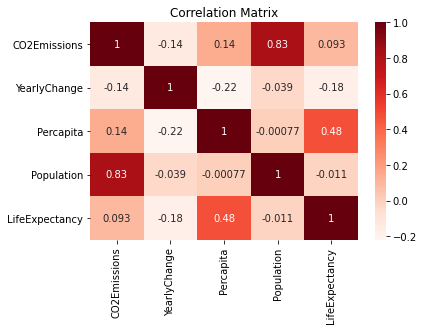

In [17]:
sns.heatmap(Df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Linear Regression model

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [19]:
features = Df[["CO2Emissions", "YearlyChange", "Percapita", "Population"]]

In [20]:
target = "LifeExpectancy" 

### Problem:
**Based on the features/variables CO2 Emissions, Yearly change, per capita and population of the countries, what will be their life expectancy??**


In [21]:
# Variables
X = features
# Output
y = Df[target]


### Splitting the data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42)

## Linear regression model

In [23]:

LR_model = LinearRegression(fit_intercept=True)



In [24]:
LR_model.fit(X_train,y_train)

LinearRegression()

In [25]:
acc = LR_model.score(X,y)

Predicts = LR_model.predict(X)

In [26]:
print(f"The accuracy score of this model is {acc}")

The accuracy score of this model is 0.2316672665862325


In [27]:
# Mean Squared Error
def mse(targets, predictions):
    return np.mean(np.square(targets - predictions))

# Root Mean Squared Error
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

loss = rmse(y, Predicts)
print('Loss:', loss)

Loss: 6.7401874089242755


## Random Forest Regressor model

In [28]:
RF = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, min_samples_split=4)

In [29]:
y_pred, y_true = [], []

for c in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42*c)
    RF.fit(X_train, y_train)
    y_pred.append(RF.predict(X_test))
    y_true.append(y_test)

In [30]:
acc = RF.score(X,y)

Predicts = RF.predict(X)

In [31]:
print(f"The accuracy score of this model is {acc}")

The accuracy score of this model is 0.7768327235933363


In [32]:
# Mean Squared Error
def mse(targets, predictions):
    return np.mean(np.square(targets - predictions))

# Root Mean Squared Error
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

loss = rmse(y, Predicts)
print('Loss:', loss)

Loss: 3.6325580293403252


In [33]:
fig = px.scatter(Df, x='LifeExpectancy', y='CO2Emissions', title='Life Expectancy vs CO2 Emissions')
fig.update_traces(marker_size=6)
fig.show()

In [34]:
fig = px.scatter_3d(Df, x='LifeExpectancy', y='CO2Emissions', z=Predicts)
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()